In [2]:
from shodan import Shodan
import inspect

api = Shodan("")

In [12]:
def print_dict_structure(d, level=0):
    for key, value in d.items():
        print(" " * level * 4, key)
        if isinstance(value, dict):
            print_dict_structure(value, level + 1)
        else:
            print(" " * (level + 1) * 4, value)

In [4]:
query = "http.favicon.hash:81586312 200"
result = api.search(query)

In [5]:
keys_list = [key for key in result]
print(keys_list)

['matches', 'total']


In [7]:
result['total']

12660

In [ ]:
result['matches']

In [ ]:
import pprint
pprint.pprint(result['matches'])

In [15]:
import json
print(json.dumps(result['matches'], indent=4))

[
    {
        "hash": -1910713737,
        "product": "Jenkins",
        "http": {
            "status": 200,
            "robots_hash": null,
            "redirects": [],
            "securitytxt": null,
            "title": "Dashboard [Jenkins]",
            "sitemap_hash": null,
            "robots": null,
            "favicon": {
                "data": "AAABAAQAMDAAAAEAIACoJQAARgAAACAgAAABACAAqBAAAO4lAAAYGAAAAQAgAIgJAACWNgAAEBAA\nAAEAIABoBAAAHkAAACgAAAAwAAAAYAAAAAEAIAAAAAAAACQAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\nAAAAAAAAAAAgHyN3IB8j/1tNOP+Lckn/bls6/2FQM/9hUDP/YVAz/2FQM/9hUDP/YVAz/2FQM/9h\nUDP/YVAz/2FQM/9hUDP/YVAz/2FQM/9hUDP/RDos8igoYfIqLHvqJCNA7SAfI/5GQTnCv6t+96CR\nbdkjIib9uLi7//X19v/o6Oj/+vr6/z06OtzEsIH/xLCB/5qJZv88NCr/YVAz/2FQM/8zLSj/JCIk\nlQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgHyPLIiAk/4JrRv+Lckn/ZlQ1/2FQM/9hUDP/\nYVAz/2FQM/9hUDP/YVAz/2FQM/9hUDP/YVAz/2FQM/9hUDP/YVAz/2FQM/9hUDP/JyUt8jE2wfMz\nONP/MzjT/zE2wvMlJlPuJyUp3SwqLNlubnH93t7h/9jY2f+urq//7e3v/zo4OenEsIH/xLCB/5aG\nY/8mJCX/XEwy/

[{'hash': 1012714907, 'product': 'Jenkins', 'http': {'status': 200, 'robots_hash': None, 'redirects': [], 'securitytxt': None, 'title': 'Dashboard [Jenkins]', 'sitemap_hash': None, 'robots': None, 'favicon': {'data': 'AAABAAQAMDAAAAEAIACoJQAARgAAACAgAAABACAAqBAAAO4lAAAYGAAAAQAgAIgJAACWNgAAEBAA\nAAEAIABoBAAAHkAAACgAAAAwAAAAYAAAAAEAIAAAAAAAACQAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\nAAAAAAAAAAAgHyN3IB8j/1tNOP+Lckn/bls6/2FQM/9hUDP/YVAz/2FQM/9hUDP/YVAz/2FQM/9h\nUDP/YVAz/2FQM/9hUDP/YVAz/2FQM/9hUDP/RDos8igoYfIqLHvqJCNA7SAfI/5GQTnCv6t+96CR\nbdkjIib9uLi7//X19v/o6Oj/+vr6/z06OtzEsIH/xLCB/5qJZv88NCr/YVAz/2FQM/8zLSj/JCIk\nlQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgHyPLIiAk/4JrRv+Lckn/ZlQ1/2FQM/9hUDP/\nYVAz/2FQM/9hUDP/YVAz/2FQM/9hUDP/YVAz/2FQM/9hUDP/YVAz/2FQM/9hUDP/JyUt8jE2wfMz\nONP/MzjT/zE2wvMlJlPuJyUp3SwqLNlubnH93t7h/9jY2f+urq//7e3v/zo4OenEsIH/xLCB/5aG\nY/8mJCX/XEwy/2FQM/9IPS3/IyEk6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAfIyAgHyP/Qjkv\n/4tySf+Hb0f/YVAz/2FQM/9hUDP/YVAz/2FQM/9hUDP/YVAz/2FQM/9hUDP/YVAz/2FQM/9hUDP/\nYV
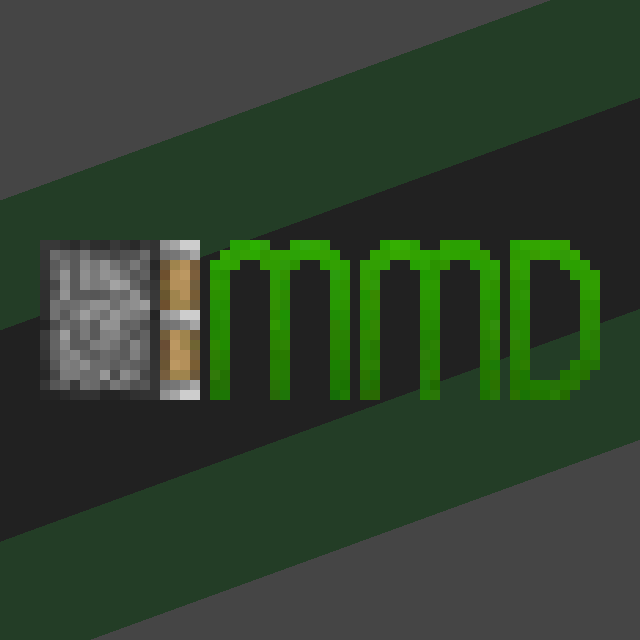

In [7]:
matches_list = [key for key in result['matches']]
print(matches_list)

In [5]:
matches = result['matches']
for item in matches:
    if "data" in item:
        http_data = item["data"]
        print(http_data)

HTTP/1.1 200 OK
Cache-Control: no-cache,no-store,must-revalidate
Content-Length: 8372
Content-Type: text/html;charset=UTF-8
Date: Sun, 04 Feb 2024 09:18:27 GMT
Expires: Thu, 01 Jan 1970 00:00:00 GMT
J-Access-Policy: https://parterner-q.aliyuncs.com/launch
Server: Jetty(9.2.z-SNAPSHOT)
Set-Cookie: JSESSIONID.ea07475a=vniejnzlx1unqw3yj4h47zy;Path=/;HttpOnly
X-Content-Type-Options: nosniff
X-Frame-Options: sameorigin
X-Hudson: 1.395
X-Hudson-Cli-Port: 34653
X-Hudson-Theme: default
X-Instance-Identity: MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEA0GJBRKPRg0vAceE5NmcXpoSb6H9A2+XUDjOFdC6UiEwGQS0/yHJbjcVtSnxK4iPAmoB5DAhhuG15j0QPZLxtZMkvJ0dcmriZw+V94ymtjqXFZT57JHVt05tI8/zXsDk2QTDrd/u/fvYJQVEKL5yPybLrB8NnGiGbIen3rdQJmBs7s2xwTOvlJ7Mr4oXw0YLcOvqFIucLQlMnZ69zuhgwZEmnz1Yc+w08RVaLXmeDRwei3bBDQqUIi2bgO3XC6/uAkwvk/nB1qjiUnE3CRTVZMeLjO1e5mmm5eg+E7nUVwr297pwP9iewG1fAPYOCoYBI7kwIVRzHNJHEPItjylniPwIDAQAB
X-Jenkins: 2.46.1
X-Jenkins-Cli-Port: 34653
X-Jenkins-Cli2-Port: 34653
X-Jenkins-Session: 633428cf
X-Ss

In [19]:
matches = result['matches']
http_data = matches[0]["data"]
http_data

'HTTP/1.1 200 OK\r\nCache-Control: no-cache,no-store,must-revalidate\r\nContent-Length: 8372\r\nContent-Type: text/html;charset=UTF-8\r\nDate: Sat, 03 Feb 2024 16:46:27 GMT\r\nExpires: Thu, 01 Jan 1970 00:00:00 GMT\r\nRedirect-Url: https://de-sam.aliyuncs.com/shop/invoice-finish/select/categories\r\nServer: Jetty(9.2.z-SNAPSHOT)\r\nSet-Cookie: JSESSIONID.ea07475a=km3r0sq1i5k9jwfgsgp1xyml;Path=/;HttpOnly\r\nX-Content-Type-Options: nosniff\r\nX-Frame-Options: sameorigin\r\nX-Hudson: 1.395\r\nX-Hudson-Cli-Port: 34653\r\nX-Hudson-Theme: default\r\nX-Instance-Identity: MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEA0GJBRKPRg0vAceE5NmcXpoSb6H9A2+XUDjOFdC6UiEwGQS0/yHJbjcVtSnxK4iPAmoB5DAhhuG15j0QPZLxtZMkvJ0dcmriZw+V94ymtjqXFZT57JHVt05tI8/zXsDk2QTDrd/u/fvYJQVEKL5yPybLrB8NnGiGbIen3rdQJmBs7s2xwTOvlJ7Mr4oXw0YLcOvqFIucLQlMnZ69zuhgwZEmnz1Yc+w08RVaLXmeDRwei3bBDQqUIi2bgO3XC6/uAkwvk/nB1qjiUnE3CRTVZMeLjO1e5mmm5eg+E7nUVwr297pwP9iewG1fAPYOCoYBI7kwIVRzHNJHEPItjylniPwIDAQAB\r\nX-Jenkins: 2.46.1\r\nX-Jenkins-Cl

In [21]:
lines = http_data.splitlines()
for line in lines:
    if line.startswith("X-Jenkins:"):
        x_jenkins_header = line.split(":", 1)[1].strip()
        print(x_jenkins_header)
        break

2.46.1


In [23]:
matches = result['matches']
for item in matches:
    if "data" in item:
        http_data = item["data"]
        x_jenkins_header = None

        for line in http_data.splitlines():
            if line.startswith("X-Jenkins:"):
                x_jenkins_header = line.split(":", 1)[1].strip()
                break

        print(f"X-Jenkins header: {x_jenkins_header or 'Not found'}")

X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.303.3
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.314
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.346.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins header for item: 2.46.1
X-Jenkins hea

In [24]:
def is_vulnerable(version):
    try:
        if version:
            if float(version) <= 2.441:
                # print(f"[i] Vulnerable to CVE-2024-23897 (Jenkins v{version} <= 2.441)")
                return True
            else:
                # print(f"[X] Not vulnerable (Jenkins v{version} > 2.441)")
                return False

    except requests.exceptions.RequestException as e:
        print(f"[X] Error making request to URL: {e}")
        sys.exit(1)

In [26]:
import re

vulnerable_versions = {
    "2.441": None,  # Vulnerable if equal or below
    "2.426.2": None  # Vulnerable if equal or below
}

def check_version_vulnerability(version_num):
    if not re.match(r"\d+\.\d+\.\d+$", version_num):
        return False

    for vulnerable_version in vulnerable_versions:
        if version_num <= vulnerable_version:
            return True

    return False

In [27]:
vulnerable = 0
notVulnerable = 0

# Analyze first 100 results
matches = result['matches']
for item in matches:
    if "data" in item:
        http_data = item["data"]
        x_jenkins_header = None

        for line in http_data.splitlines():
            if line.startswith("X-Jenkins:"):
                x_jenkins_header = line.split(":", 1)[1].strip()
                break

        if x_jenkins_header:
            if check_version_vulnerability(x_jenkins_header):
                print("Vulnerable")
                global vulnerable
                vulnerable += 1
            else:
                global notVulnerable
                notVulnerable += 1

print(f"Total Vulnerable: {vulnerable}")
print(f"Total NotVulnerable: {notVulnerable}")

Vulnerable
Vulnerable
Vulnerable
Vulnerable
Vulnerable
Vulnerable
Vulnerable
Total valid headers: 7
Total invalid headers: 92
